# This notebook analyze the data for the wino(+) like LSP. The data satisfy the relic density with $\Omega h^2$. 

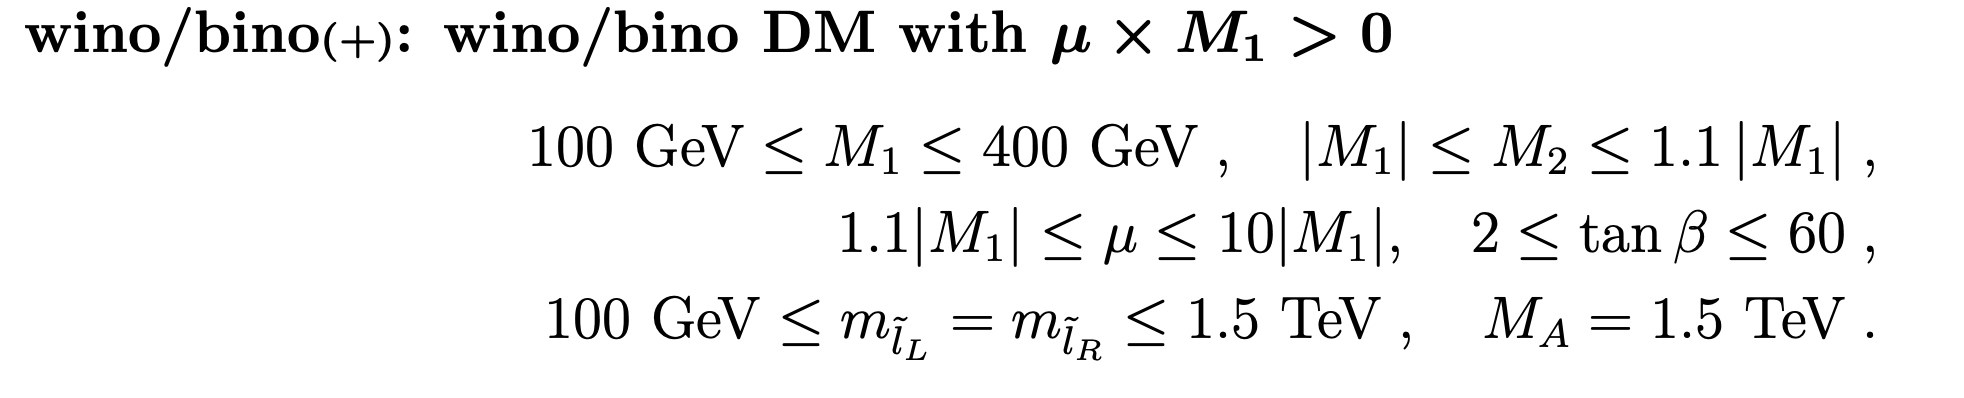

In [1]:
import os
import glob
from tqdm import tqdm
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#-------------------------------------------#
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm

In [2]:
data = np.load('/Users/hammad/work/DM/data/MSSM_out_wino_plus.npz',allow_pickle=True)['arr_0']

In [3]:
m1= data[:,0];m2= data[:,1];mu= data[:,2];tan= data[:,3];m_chi1= data[:,4];m_chi2= data[:,5];m_chi3= data[:,6];
m_chi4= data[:,7];m_cha1= data[:,8];m_cha2= data[:,9];g_2= data[:,10];σ1= data[:,11];decay= data[:,12];Ω= data[:,13];
proton_dd= data[:,14];neutron_dd= data[:,15];ZNH= data[:,16];ZNW= data[:,17];ZNB= data[:,18];ZNH2= data[:,19];
ZNW2= data[:,20];ZNB2= data[:,21];br_chi= data[:,22];br_cha= data[:,23];dummy= data[:,24];HB= data[:,25];


In [4]:
coeff = 4*3.8937966e08/(np.pi)*pow((0.939*m_chi1)/(0.939+m_chi1),2)
DD = coeff*proton_dd**2

In [5]:
c0= HB ==1
c1 = Ω< 0.122
c2 = (Ω< 0.122) & (DD < 1e-10)
c3 = (Ω< 0.122) & (DD < 1e-10) &  (σ1 > 0.6)
c5 = (Ω< 0.122) & (DD < 1e-10) & (g_2 <1e-10) & (σ1 > 0.6)

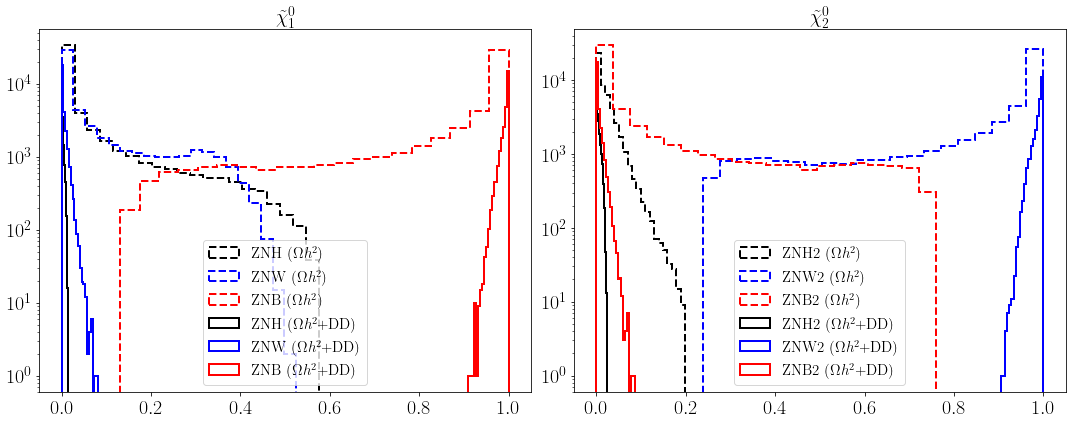

In [6]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.hist(ZNH[c1],bins=20,histtype='step',fill=False,label='ZNH ($\Omega h^2$)',linestyle='--',linewidth=2,color='k');
plt.hist(ZNW[c1],bins=20,histtype='step',fill=False,label='ZNW ($\Omega h^2$)',linestyle='--',linewidth=2,color='b');
plt.hist(ZNB[c1],bins=20,histtype='step',fill=False,label='ZNB ($\Omega h^2$)',linestyle='--',linewidth=2,color='r');


plt.hist(ZNH[c2],bins=20,histtype='step',fill=False,label='ZNH ($\Omega h^2$+DD)',linewidth=2,color='k');
plt.hist(ZNW[c2],bins=20,histtype='step',fill=False,label='ZNW ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='b');
plt.hist(ZNB[c2],bins=20,histtype='step',fill=False,label='ZNB ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='r');


plt.legend(fontsize=15);
plt.title(r'$\tilde{\chi}^0_1$',fontsize=20)
plt.tick_params('both',labelsize=20)
plt.yscale('log')

fig.add_subplot(122)
plt.hist(ZNH2[c1],bins=20,histtype='step',fill=False,label='ZNH2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='k');
plt.hist(ZNW2[c1],bins=20,histtype='step',fill=False,label='ZNW2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='b');
plt.hist(ZNB2[c1],bins=20,histtype='step',fill=False,label='ZNB2 ($\Omega h^2$)',linestyle='--',linewidth=2,color='r');


plt.hist(ZNH2[c2],bins=20,histtype='step',fill=False,label='ZNH2 ($\Omega h^2$+DD)',linewidth=2,color='k');
plt.hist(ZNW2[c2],bins=20,histtype='step',fill=False,label='ZNW2 ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='b');
plt.hist(ZNB2[c2],bins=20,histtype='step',fill=False,label='ZNB2 ($\Omega h^2$+DD)',linewidth=2,linestyle='-',color='r');

plt.legend(fontsize=15);
plt.title(r'$\tilde{\chi}^0_2$',fontsize=20)
plt.tick_params('both',labelsize=20)
plt.yscale('log');
plt.tight_layout()

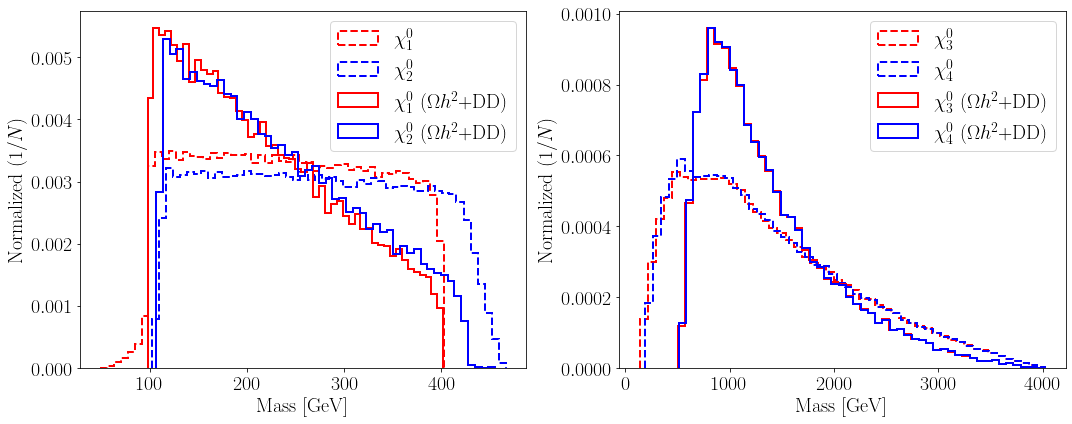

In [15]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.hist(m_chi1,bins=50,histtype='step',fill=False,label=r'$\chi^0_1$',linewidth=2,density=True,linestyle='--',color='r');
plt.hist(m_chi2,bins=50,histtype='step',fill=False,label=r'$\chi^0_2$',linewidth=2,density=True,linestyle='--',color='b');
plt.hist(m_chi1[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_1$ ($\Omega h^2$+DD) ',linewidth=2,density=True,color='r');
plt.hist(m_chi2[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_2$ ($\Omega h^2$+DD)',linewidth=2,density=True,color='b');

plt.xlabel('Mass [GeV]',fontsize=20);
plt.ylabel('Normalized $(1/N)$',fontsize=20);
plt.tick_params('both', labelsize=20);
plt.legend(fontsize=20);
fig.add_subplot(122)
plt.hist(m_chi3,bins=50,histtype='step',fill=False,label=r'$\chi^0_3$',linewidth=2,density=True,linestyle='--',color='r');
plt.hist(m_chi4,bins=50,histtype='step',fill=False,label=r'$\chi^0_4$',linewidth=2,density=True,linestyle='--',color='b');

plt.hist(m_chi3[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_3$ ($\Omega h^2$+DD)',linewidth=2,density=True,color='r');
plt.hist(m_chi4[c2],bins=50,histtype='step',fill=False,label=r'$\chi^0_4$ ($\Omega h^2$+DD)',linewidth=2,density=True,color='b');



plt.xlabel('Mass [GeV]',fontsize=20);
plt.ylabel('Normalized $(1/N)$',fontsize=20);
plt.tick_params('both', labelsize=20);
#plt.yscale('symlog');
plt.legend(fontsize=20);
plt.tight_layout()

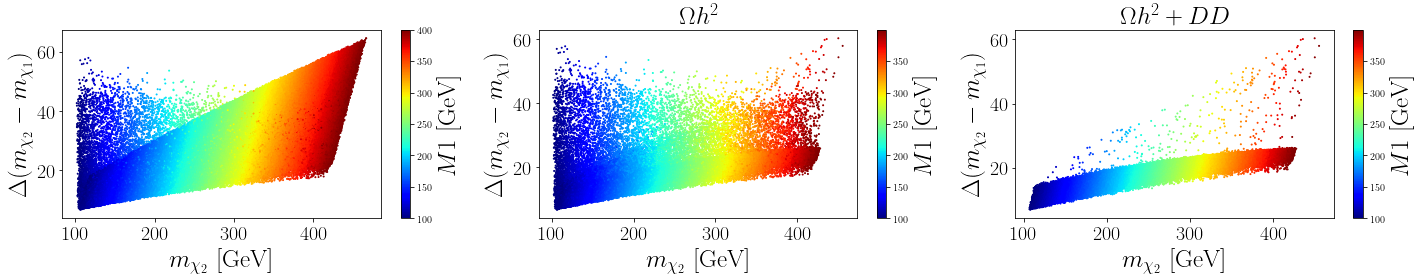

In [23]:
fig = plt.figure(figsize=(20,4))
fig.add_subplot(131)
plt.scatter(m_chi2,m_chi2-m_chi1,c=m1,s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);

#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);


fig.add_subplot(132)
plt.scatter(m_chi2[c1],m_chi2[c1]-m_chi1[c1],c=m1[c1],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);
plt.title(r'$\Omega h^2$',fontsize=25)
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);



fig.add_subplot(133)
plt.scatter(m_chi2[c2],m_chi2[c2]-m_chi1[c2],c=m1[c2],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);
plt.title(r'$\Omega h^2+DD$',fontsize=25)
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$ [GeV]',fontsize=25);
plt.tight_layout()

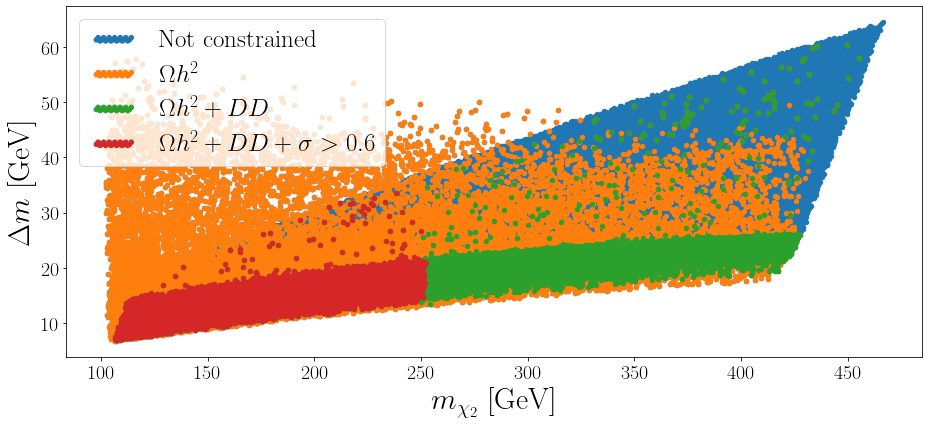

In [27]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2,m_chi2-m_chi1,s=20,label=r'Not constrained');
plt.scatter(m_chi2[c1],m_chi2[c1]-m_chi1[c1],s=20,label=r'$\Omega h^2$');
plt.scatter(m_chi2[c2],m_chi2[c2]-m_chi1[c2],s=20,label=r'$\Omega h^2+DD$');
plt.scatter(m_chi2[c3],m_chi2[c3]-m_chi1[c3],s=20,label=r'$\Omega h^2+DD+\sigma > 0.6$');
#plt.yscale('log');
plt.ylabel(r'$\Delta m$ [GeV]',fontsize=30);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=30);
plt.tick_params('both',labelsize=20);
plt.legend(fontsize=25,scatterpoints=20)
plt.tight_layout()

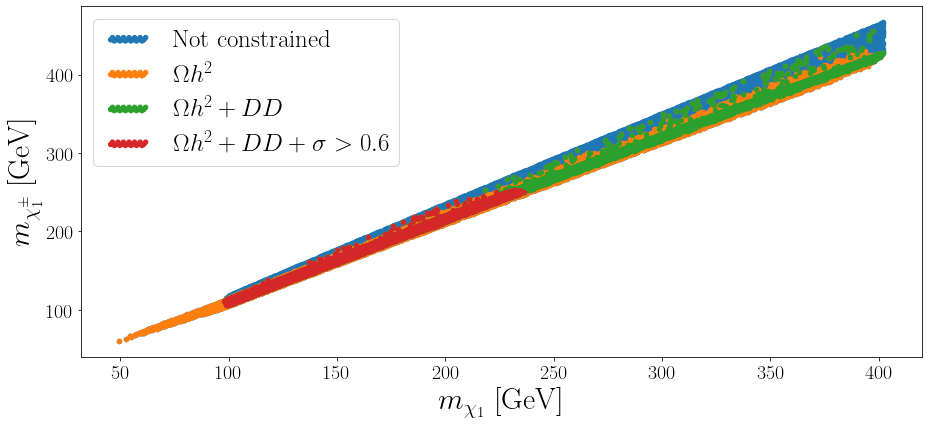

In [29]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi1,m_cha1,s=20,label=r'Not constrained');
plt.scatter(m_chi1[c1],m_cha1[c1],s=20,label=r'$\Omega h^2$');
plt.scatter(m_chi1[c2],m_cha1[c2],s=20,label=r'$\Omega h^2+DD$');
plt.scatter(m_chi1[c3],m_cha1[c3],s=20,label=r'$\Omega h^2+DD+\sigma > 0.6$');
#plt.yscale('log');
plt.ylabel(r'$m_{\chi^\pm_1}$ [GeV]',fontsize=30);
plt.xlabel(r'$m_{\chi_1}$ [GeV]',fontsize=30);
plt.tick_params('both',labelsize=20);
plt.legend(fontsize=25,scatterpoints=20)
plt.tight_layout()

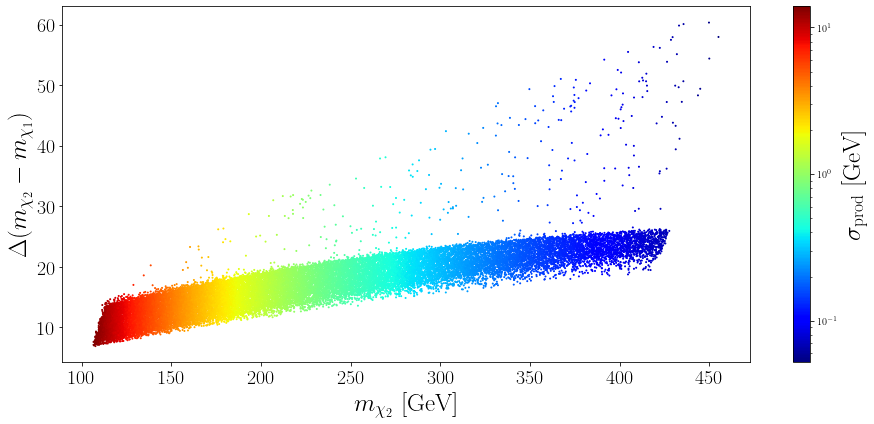

In [32]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2[c2],m_chi2[c2]-m_chi1[c2],c=σ1[c2],s=1,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
#plt.yscale('log');
plt.ylabel(r'$\Delta( m_{\chi_2} - m_{\chi_1})$',fontsize=25);
plt.xlabel(r'$m_{\chi_2}$ [GeV]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm prod}$ [GeV]',fontsize=25);
plt.tight_layout()

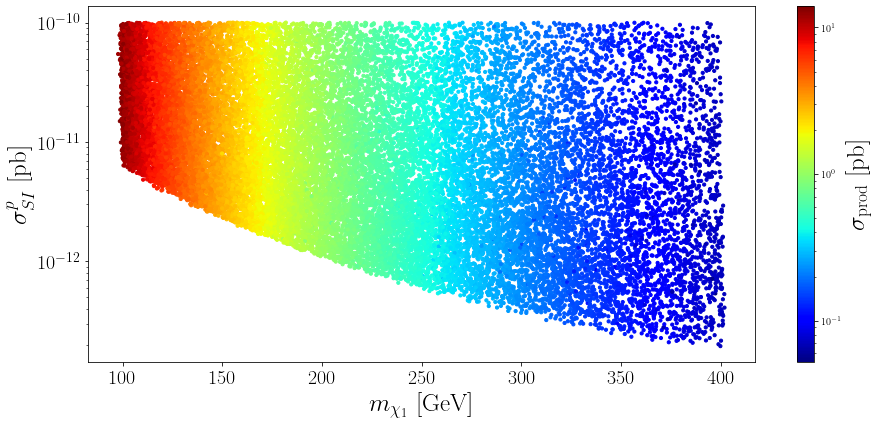

In [34]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi1[c2],DD[c2],c=σ1[c2],s=10,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma^p_{SI}$ [pb]',fontsize=25);
plt.xlabel(r'$m_{\chi_1}$ [GeV]',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm prod}$ [pb]',fontsize=25);
plt.tight_layout()

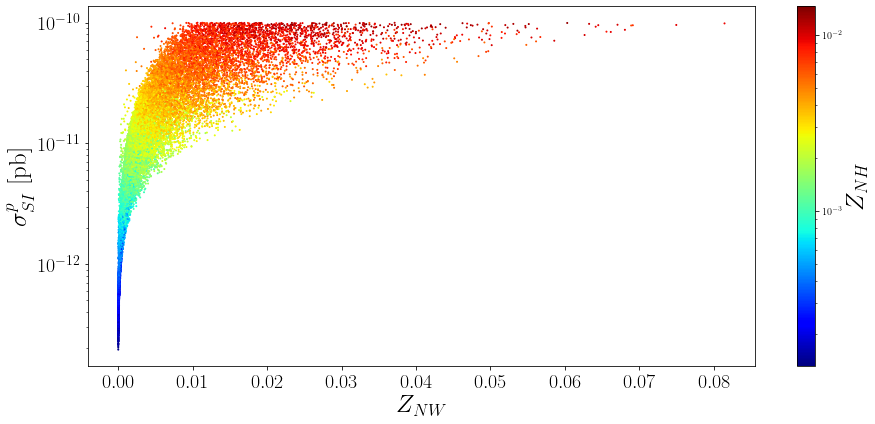

In [37]:
plt.figure(figsize=(13,6))
plt.scatter(ZNW[c2],DD[c2],c=ZNH[c2],s=1,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma^p_{SI}$ [pb]',fontsize=25);
plt.xlabel(r'$Z_{NW}$',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$Z_{NH}$',fontsize=25);
plt.tight_layout()

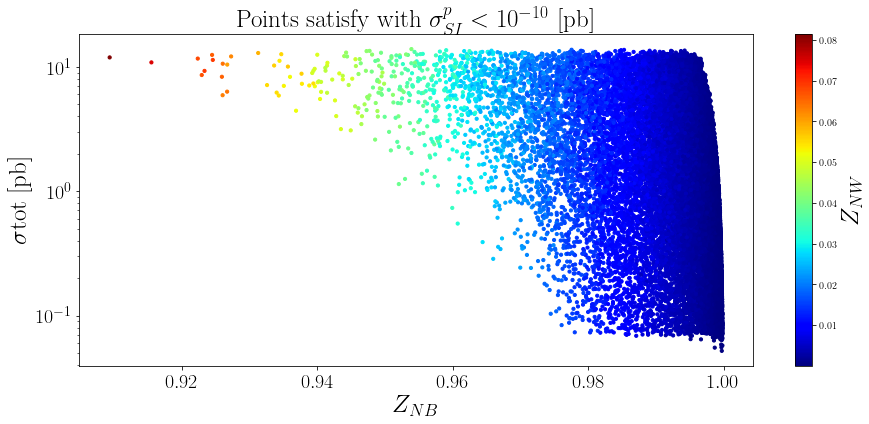

In [39]:
plt.figure(figsize=(13,6))
plt.scatter(ZNB[c2],σ1[c2],c=ZNW[c2],s=10,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma{\rm tot}$ [pb]',fontsize=25);
plt.xlabel(r'$Z_{NB}$',fontsize=25);
plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$Z_{NW}$',fontsize=25);
plt.tight_layout()

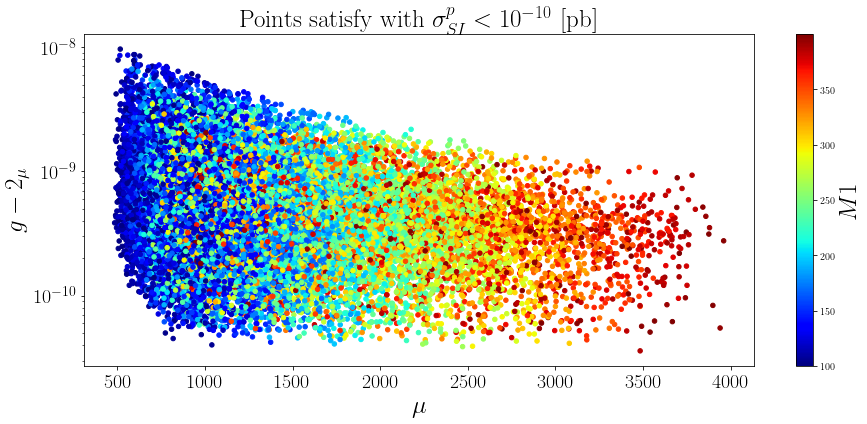

In [40]:
plt.figure(figsize=(13,6))
plt.scatter(mu[c2],g_2[c2],c=m1[c2],s=20,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$g-2_{\mu}$',fontsize=25);
plt.xlabel(r'$\mu$',fontsize=25);
plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$M1$',fontsize=25);
plt.tight_layout()

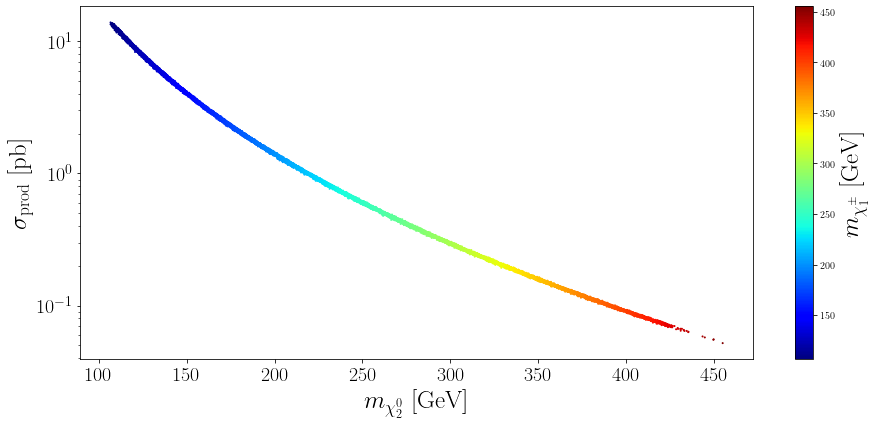

In [41]:
plt.figure(figsize=(13,6))
plt.scatter(m_chi2[c2],σ1[c2],c=m_cha1[c2],s=1,label=r'$\chi^0_1$',norm=None,cmap='jet');
plt.yscale('log');
plt.ylabel(r'$\sigma_{\rm prod}$ [pb]',fontsize=25);
plt.xlabel(r'$m_{\chi^0_2}$ [GeV]',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$m_{\chi^\pm_1}$ [GeV]',fontsize=25);
plt.tight_layout()

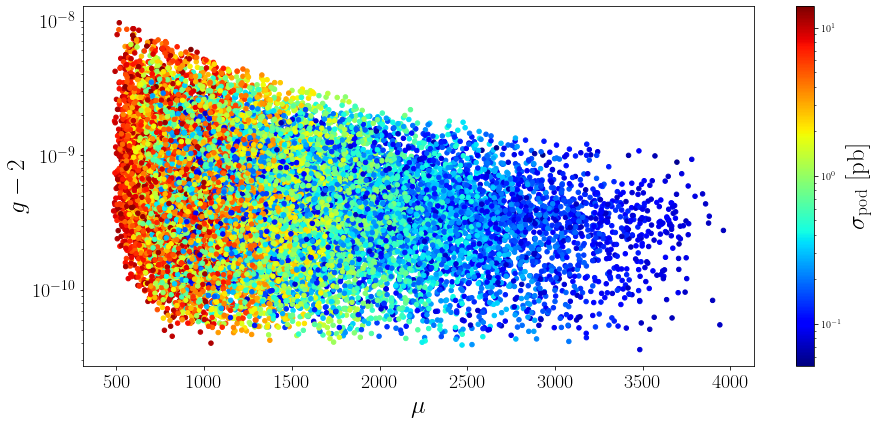

In [42]:
plt.figure(figsize=(13,6))
plt.scatter(mu[c2],g_2[c2],c=σ1[c2],s=20,label=r'$\chi^0_1$',norm=LogNorm(),cmap='jet');
plt.yscale('log');
#plt.xscale('log');
plt.xlabel(r'$\mu$',fontsize=25);
plt.ylabel(r'$g-2$',fontsize=25);
#plt.title(r'Points satisfy with $\sigma^p_{SI} < 10^{-10}$ [pb]',fontsize=25);
plt.tick_params('both',labelsize=20);
#plt.legend(fontsize = 20);
cbar = plt.colorbar();
cbar.ax.set_ylabel(r'$\sigma_{\rm pod}$ [pb]',fontsize=25);
plt.tight_layout()